In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
# import sklearn.metrics import accuracy 
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import torchsummary


In [2]:
(x_train,_), (x_test,_) = fashion_mnist.load_data()



In [3]:
x_train = x_train /255.0
x_test = x_test /255.0

In [4]:
x_train = x_train[1:1000,:,:]
x_test = x_test[1:1000, :,:]

In [6]:
x_train.shape

(999, 28, 28)

In [15]:
x_train = np.reshape(x_train, (999,28,28,1))
x_train.shape

(999, 28, 28, 1)

In [16]:
x_test = np.reshape(x_test, (999,28,28,1))
x_test.shape

(999, 28, 28, 1)

define model

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Autoencoder class
class Autoencoder(models.Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        
        # Encoder
        self.encoder = models.Sequential([
            layers.InputLayer(input_shape=(28, 28, 1)),  
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu')
        ])
        
        # Decoder
        self.decoder = models.Sequential([
            layers.InputLayer(input_shape=(latent_dim,)),
            layers.Dense(7*7*64, activation='relu'),
            layers.Reshape((7, 7, 64)),
            layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded


In [18]:
# shape = x_train.shape[1:]
# print(shape)
latent_dim = 32
# hidden_size = 128
autoencoder = Autoencoder(latent_dim)
autoencoder

In [19]:
# autoencoder.summary()

In [20]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [25]:
autoencoder.fit(x_train, x_train,
                batch_size=32,
                epochs=50,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
32/32 [==============================] - 1s 19ms/step - loss: 0.0210 - val_loss: 0.0223
Epoch 2/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0203 - val_loss: 0.0216
Epoch 3/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0196 - val_loss: 0.0211
Epoch 4/50
32/32 [==============================] - 0s 10ms/step - loss: 0.0190 - val_loss: 0.0201
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0186 - val_loss: 0.0203
Epoch 6/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0184 - val_loss: 0.0198
Epoch 7/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0179 - val_loss: 0.0193
Epoch 8/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0172 - val_loss: 0.0193
Epoch 9/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0169 - val_loss: 0.0188
Epoch 10/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0167 - val_loss: 0.0183
Epoch 11/50
32/32

In [26]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

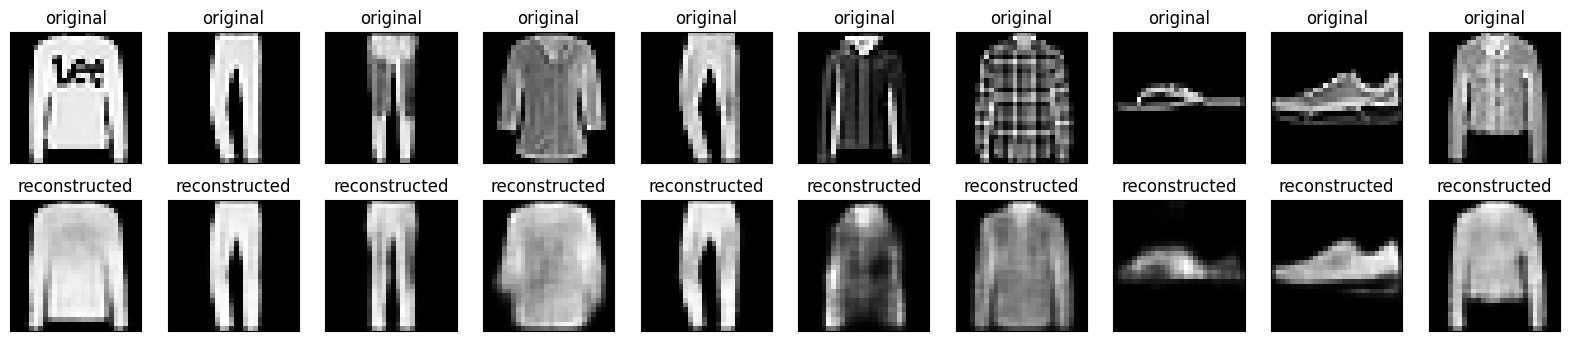

In [27]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()